<a href="https://colab.research.google.com/github/shadybrook/BasicSentimentAnalysisAI/blob/main/BasicSentimentAnalysisforMovieReviews2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kaggle

In [5]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [10]:
kaggle_dictionary = json.load(open('/kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_dictionary['username']
os.environ['KAGGLE_KEY'] = kaggle_dictionary['key']

In [11]:
data = pd.read_csv("/IMDB Dataset.csv")

In [12]:
data.shape

(50000, 2)

In [13]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [13]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [15]:
data.replace({"positive": 1,"negative": 0},inplace=True)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [16]:
train_data,test_data = train_test_split(data,test_size=0.2, random_state=42)

In [17]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


In [18]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen=400)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen=400)

In [19]:
print(X_train.shape)
print(X_test.shape)

(40000, 400)
(10000, 400)


In [25]:
print(X_train)
print(X_test)

[[   0    0    0 ...  205  351 3856]
 [   0    0    0 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]
[[   0    0    0 ...  995  719  155]
 [   0    0    0 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [20]:
Y_train = train_data['sentiment']
Y_test = test_data['sentiment']

In [ ]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


***Long Short Term Memory Model***

In [21]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128 , input_length=400))
model.add(LSTM(128, dropout=0.25, recurrent_dropout=0.25))
model.add(Dense(1,activation='sigmoid'))

model.build(input_shape=(None, 200))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train, Y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - accuracy: 0.7071 - loss: 0.5539 - val_accuracy: 0.8104 - val_loss: 0.4237
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.8204 - loss: 0.4122 - val_accuracy: 0.8196 - val_loss: 0.4180
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.8434 - loss: 0.3669 - val_accuracy: 0.8586 - val_loss: 0.3448
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 508s 1s/step - accuracy: 0.8479 - loss: 0.3624 - val_accuracy: 0.8316 - val_loss: 0.3750
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.8688 - loss: 0.3184 - val_accuracy: 0.8779 - val_loss: 0.2834


In [26]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 223ms/step - accuracy: 0.8873 - loss: 0.2733
Test Loss: 0.27179229259490967
Test Accuracy: 0.888700008392334


In [27]:
def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
    return sentiment, prediction[0][0]

In [66]:
new_review = "ONE OF THE BEST EPISODES- LAUGHED, CRIED AND FELT SEEN. THANK YOU @hubermanlab & @themarthabeck ❤️"
sentiment= predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The sentiment of the review is: ('Positive', 0.9864251)


In [50]:
new_review = "Just VFX, Even I don't know which way Bollywood is going, but all the films that have come in the last 2 years are ridiculous, Bollywood will have to think about how to make good films. I can't even call it time waste because it was a film below time waste... Shahrukh khan's acting was Okay but other characters were duin' over acting... no storyline and no sense of direction .... they need to think about roles in this film industry, south cinema is much better than bollywood now... even our punjabi cinema duni' good job in films, bcoz if film's genre was comedy than it must be funny, but this film was seriously too much funny even in action part,"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The sentiment of the review is: ('Negative', 0.049103584)


In [56]:
new_review = "Everyone hating on a kid ? Seriously ? She is not even mature enough to know whats right and wrong"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The sentiment of the review is: ('Negative', 0.47941077)


***Analysing Instagram Comments for Sentiment Analysis***

In [60]:
# Function to predict sentiment
def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
    return sentiment, prediction[0][0]

# Read the CSV file with a specified encoding
file_path = '/insta_comments.csv'  # Path to your CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Access the comments from column E (indexing columns by position, 'E' is the 4th column)
comments = df.iloc[:, 4]  # Assuming 'E' is the 5th column (0-indexed, 4 is the index for column 'E')

# Total number of comments before dropping missing values
total_comments = len(comments)

# Drop missing values and convert all comments to strings
comments = comments.dropna().astype(str)

# Number of comments dropped
dropped_comments = total_comments - len(comments)

# Process each comment and predict sentiment
analyzed_comments = 0
for comment in comments:
    sentiment, score = predict_sentiment(comment)
    print(f"Comment: {comment}")
    print(f"Sentiment: {sentiment} with score: {score}\n")
    analyzed_comments += 1

# Print the summary of analysis
print(f"Total comments analyzed: {analyzed_comments}")
print(f"Total comments dropped due to missing values: {dropped_comments}")
print(f"Total comments in the dataset: {total_comments}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Comment: ????????
Sentiment: Negative with score: 0.24407291412353516

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Comment: @ok_chiragg nice work bro ??
Sentiment: Negative with score: 0.23678991198539734

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Comment: One more reason why we should not help the poor in India????
Sentiment: Negative with score: 0.0698777586221695

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Comment: Momo  bechen e ka style thoda casual hai ????????
Sentiment: Negative with score: 0.250463604927063

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Comment: @ok_chiragg respect++++ bhai for you aapke jaise logo ki wajse insaniyat pe aaj bhi bharosa rakh sakte hai es generation mai bhi ye aapne jo achha kaam kiya na eska return aapko bahut achhe gift ke sath hoga don't worry and keep going your that one act can inspired  100 peoples ????
Sentiment: Positive with score: 0.9205856323242188

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Comment: @pratiknaik04 let's go

***Visualising Aaryan Kataria's Comments***

In [61]:
pip install matplotlib

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Comment: ????????
Sentiment: Negative with score: 0.24407291412353516

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Comment: @ok_chiragg nice work bro ??
Sentiment: Negative with score: 0.23678991198539734

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Comment: One more reason why we should not help the poor in India????
Sentiment: Negative with score: 0.0698777586221695

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Comment: Momo  bechen e ka style thoda casual hai ????????
Sentiment: Negative with score: 0.250463604927063

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Comment: @ok_chiragg respect++++ bhai for you aapke jaise logo ki wajse insaniyat pe aaj bhi bharosa rakh sakte hai es generation mai bhi ye aapne jo achha kaam kiya na eska return aapko bahut achhe gift ke sath hoga don't worry and keep going your that one act can inspired  100 peoples ????
Sentiment: Positive with score: 0.9205856323242188

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Comment: @pratiknaik04 let'

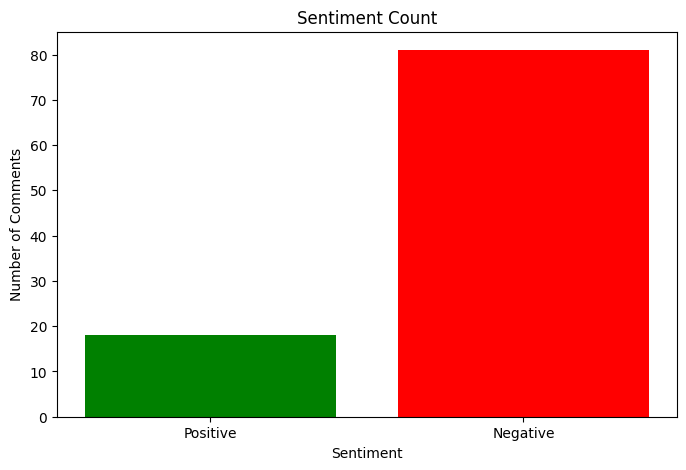

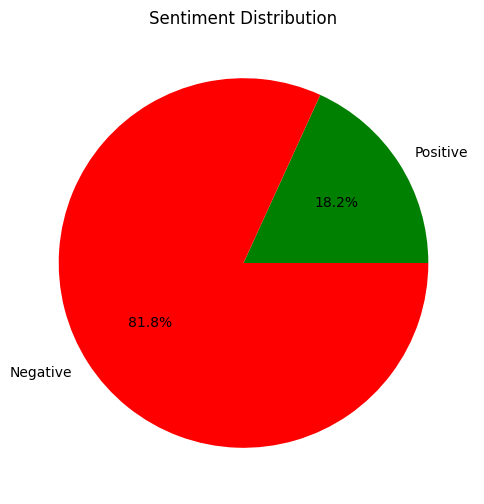

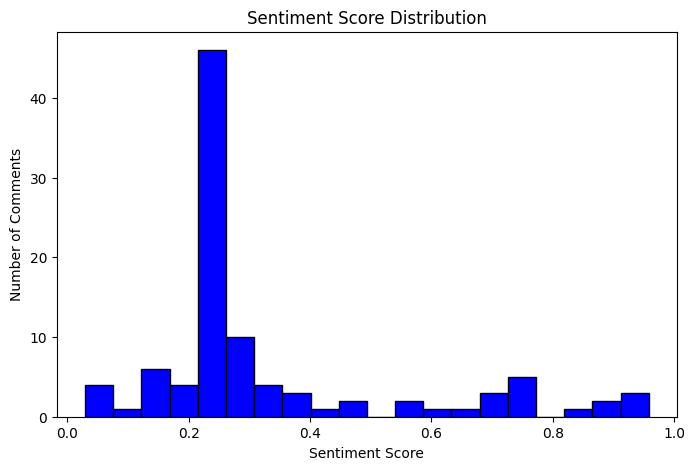

In [62]:

import matplotlib.pyplot as plt

# Function to predict sentiment
def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
    return sentiment, prediction[0][0]

# Read the CSV file with a specified encoding
file_path = '/insta_comments.csv'  # Path to your CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Access the comments from column E (indexing columns by position, 'E' is the 4th column)
comments = df.iloc[:, 4]  # Assuming 'E' is the 5th column (0-indexed, 4 is the index for column 'E')

# Total number of comments before dropping missing values
total_comments = len(comments)

# Drop missing values and convert all comments to strings
comments = comments.dropna().astype(str)

# Number of comments dropped
dropped_comments = total_comments - len(comments)

# Variables to store results for visualization
sentiments = []
scores = []

# Process each comment and predict sentiment
analyzed_comments = 0
for comment in comments:
    sentiment, score = predict_sentiment(comment)
    sentiments.append(sentiment)
    scores.append(score)
    print(f"Comment: {comment}")
    print(f"Sentiment: {sentiment} with score: {score}\n")
    analyzed_comments += 1

# Print the summary of analysis
print(f"Total comments analyzed: {analyzed_comments}")
print(f"Total comments dropped due to missing values: {dropped_comments}")
print(f"Total comments in the dataset: {total_comments}")

# Plotting the results
# Bar Chart for Sentiment Count
plt.figure(figsize=(8, 5))
plt.bar(['Positive', 'Negative'], [sentiments.count('Positive'), sentiments.count('Negative')], color=['green', 'red'])
plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# Pie Chart for Sentiment Distribution
plt.figure(figsize=(6, 6))
plt.pie([sentiments.count('Positive'), sentiments.count('Negative')],
        labels=['Positive', 'Negative'],
        colors=['green', 'red'],
        autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

# Histogram for Sentiment Scores
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=20, color='blue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.show()


***Lex Friedmans Instagram Post about telegram founder***

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Comment: Lex, welcome to the adult's world. Bots are not allowed here.
Sentiment: Negative with score: 0.3628963530063629

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Comment: Yes.
Sentiment: Negative with score: 0.2895348072052002

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Comment: ??????????
Sentiment: Negative with score: 0.24407291412353516

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Comment: How about the CEOs that facilitated the housing market crisis? They get severance packages? Make it make sense.
Sentiment: Negative with score: 0.4237266182899475

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Comment: !!!!!@estes_j IIt's not a team sport
Sentiment: Negative with score: 0.1491309404373169

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Comment: A sovereign government is able to do what it wants according to the will of its people. @lexfridman enlightened centrist bullshit is wearing thin ????
Sentiment: Positive with score: 0.8403106331825256

1/1 ━━━━━━━━━━━━━━━━━━━━ 0

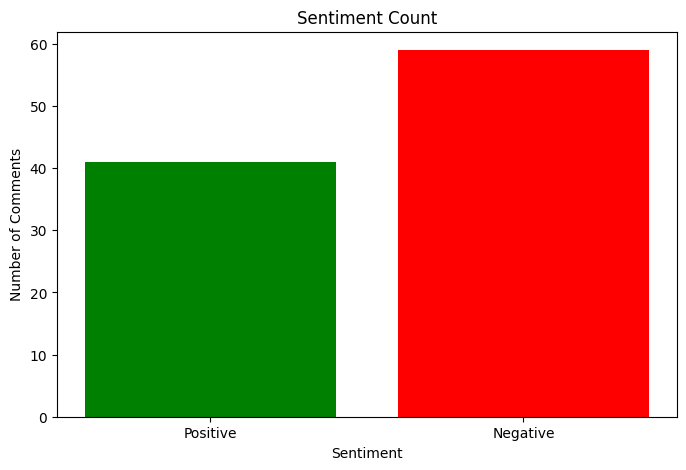

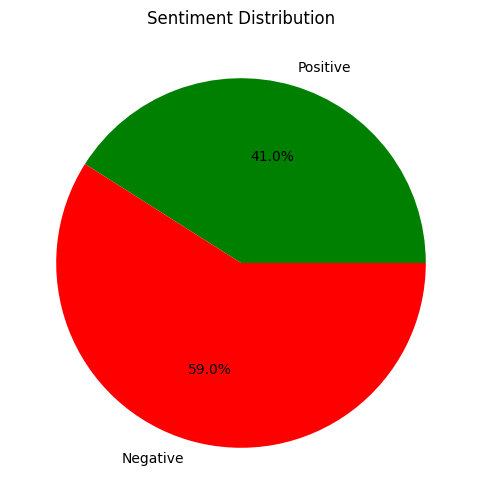

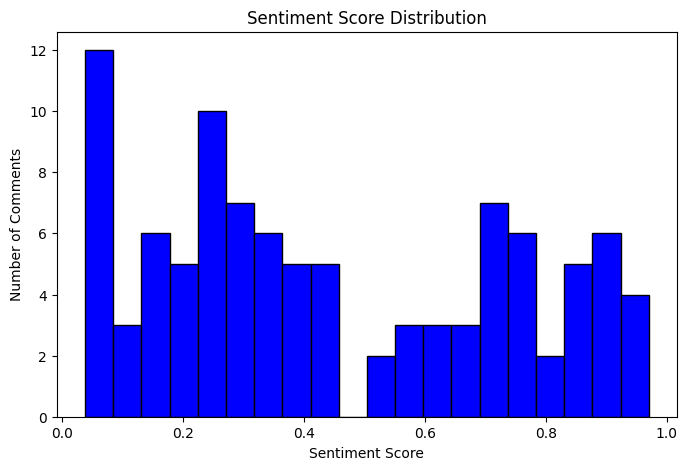

In [63]:

import matplotlib.pyplot as plt

# Function to predict sentiment
def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
    return sentiment, prediction[0][0]

# Read the CSV file with a specified encoding
file_path = '/insta_comments_lexfridman.csv'  # Path to your CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Access the comments from column E (indexing columns by position, 'E' is the 4th column)
comments = df.iloc[:, 4]  # Assuming 'E' is the 5th column (0-indexed, 4 is the index for column 'E')

# Total number of comments before dropping missing values
total_comments = len(comments)

# Drop missing values and convert all comments to strings
comments = comments.dropna().astype(str)

# Number of comments dropped
dropped_comments = total_comments - len(comments)

# Variables to store results for visualization
sentiments = []
scores = []

# Process each comment and predict sentiment
analyzed_comments = 0
for comment in comments:
    sentiment, score = predict_sentiment(comment)
    sentiments.append(sentiment)
    scores.append(score)
    print(f"Comment: {comment}")
    print(f"Sentiment: {sentiment} with score: {score}\n")
    analyzed_comments += 1

# Print the summary of analysis
print(f"Total comments analyzed: {analyzed_comments}")
print(f"Total comments dropped due to missing values: {dropped_comments}")
print(f"Total comments in the dataset: {total_comments}")

# Plotting the results
# Bar Chart for Sentiment Count
plt.figure(figsize=(8, 5))
plt.bar(['Positive', 'Negative'], [sentiments.count('Positive'), sentiments.count('Negative')], color=['green', 'red'])
plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# Pie Chart for Sentiment Distribution
plt.figure(figsize=(6, 6))
plt.pie([sentiments.count('Positive'), sentiments.count('Negative')],
        labels=['Positive', 'Negative'],
        colors=['green', 'red'],
        autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

# Histogram for Sentiment Scores
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=20, color='blue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Comment: I hope many old people get to live with their families and enjoy their grandkids. Nature has role for everyone kids need warmt and love and grandparents need grandkids ,while physically able people go out and work.
Sentiment: Positive with score: 0.9717734456062317

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Comment: Good insight .
Sentiment: Negative with score: 0.3679187595844269

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Comment: There is already competitor in this field it's Tata funded company GoodFellows
Sentiment: Negative with score: 0.3177494406700134

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Comment: I feel this will go more towards real estate sector and will cater more to HNIs and that will be a good approach as well cause they will make money else it can be a high operating leverage business.
Sentiment: Positive with score: 0.6301066279411316

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Comment: Wonderful and very progressive thought ????
Sent

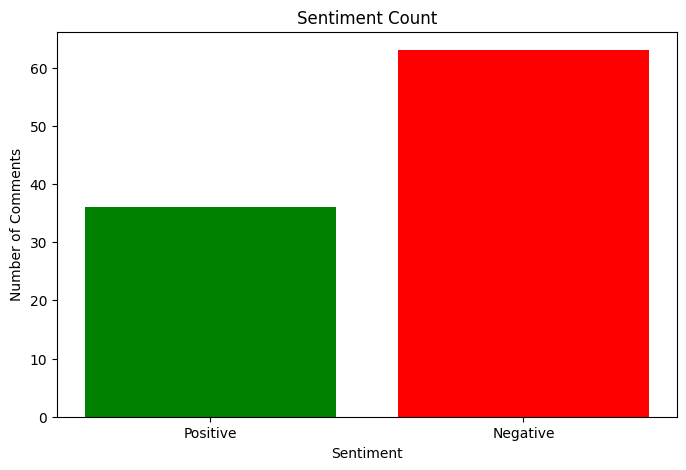

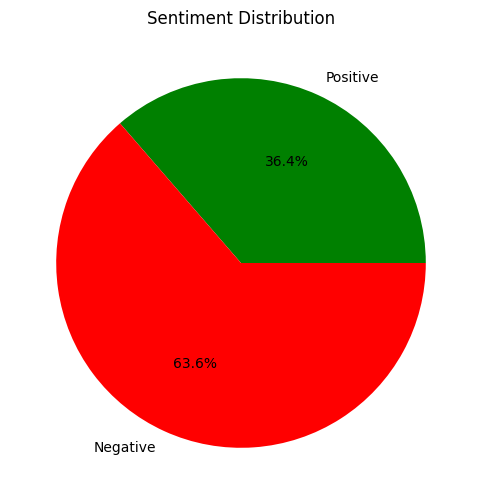

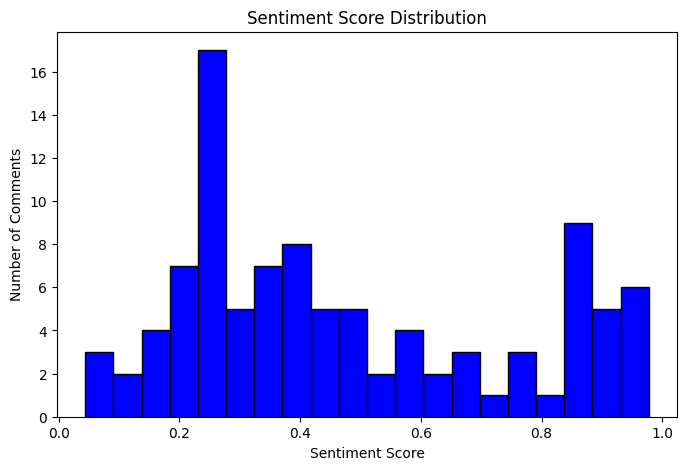

In [65]:

import matplotlib.pyplot as plt

# Function to predict sentiment
def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
    return sentiment, prediction[0][0]

# Read the CSV file with a specified encoding
file_path = '/insta_comments_nikhilkamath.csv'  # Path to your CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Access the comments from column E (indexing columns by position, 'E' is the 4th column)
comments = df.iloc[:, 4]  # Assuming 'E' is the 5th column (0-indexed, 4 is the index for column 'E')

# Total number of comments before dropping missing values
total_comments = len(comments)

# Drop missing values and convert all comments to strings
comments = comments.dropna().astype(str)

# Number of comments dropped
dropped_comments = total_comments - len(comments)

# Variables to store results for visualization
sentiments = []
scores = []

# Process each comment and predict sentiment
analyzed_comments = 0
for comment in comments:
    sentiment, score = predict_sentiment(comment)
    sentiments.append(sentiment)
    scores.append(score)
    print(f"Comment: {comment}")
    print(f"Sentiment: {sentiment} with score: {score}\n")
    analyzed_comments += 1

# Print the summary of analysis
print(f"Total comments analyzed: {analyzed_comments}")
print(f"Total comments dropped due to missing values: {dropped_comments}")
print(f"Total comments in the dataset: {total_comments}")

# Plotting the results
# Bar Chart for Sentiment Count
plt.figure(figsize=(8, 5))
plt.bar(['Positive', 'Negative'], [sentiments.count('Positive'), sentiments.count('Negative')], color=['green', 'red'])
plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# Pie Chart for Sentiment Distribution
plt.figure(figsize=(6, 6))
plt.pie([sentiments.count('Positive'), sentiments.count('Negative')],
        labels=['Positive', 'Negative'],
        colors=['green', 'red'],
        autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

# Histogram for Sentiment Scores
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=20, color='blue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.show()
